# Import our modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
import os
from scipy import ndimage # multidimensional image processing
from skimage.color import rgb2hsv # image processing algorithms
from skimage.feature import local_binary_pattern

### Change run time to gpu
Tools -> Runtime -> GPU

# Mount to google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Get images and process

In [ ]:
test_images=[]
test_labels = []

data_path = '/content/drive/Shareddrives/Machine_Vision_Group_4/MinneApple_Datasets/Comparison_test_dataset/test_combined/'

dataset = list(os.listdir(data_path))          
dataset.sort()
print(dataset)
# there are 32 images in our validation dataset with associated txt files that contain the position of the detected apples
for i in range(32):
  # Now order is sorted, we just want to take the even ones as these are the png images.
  img_name = data_path  + dataset[2*i]
  # the odd ones are the corresponding labels
  img_label = data_path + dataset [2*i + 1]
  print("name: " + img_name)
  print("label: " + img_label)

  test_images.append(img_name)
  test_labels.append(img_label)

['dataset1_back_1081_png.rf.61ad8a45c7a6cfefce41e0ae4aa209f1.jpg', 'dataset1_back_1081_png.rf.61ad8a45c7a6cfefce41e0ae4aa209f1.txt', 'dataset1_back_1141_png.rf.0216021bb8e9179983fb45da0c6fa934.jpg', 'dataset1_back_1141_png.rf.0216021bb8e9179983fb45da0c6fa934.txt', 'dataset1_back_301_png.rf.ab9701d9c6a849627fce81f64d5105c7.jpg', 'dataset1_back_301_png.rf.ab9701d9c6a849627fce81f64d5105c7.txt', 'dataset1_back_991_png.rf.5626aedb831e06350ffdb6b3e8f01569.jpg', 'dataset1_back_991_png.rf.5626aedb831e06350ffdb6b3e8f01569.txt', 'dataset1_front_1231_png.rf.50e9ade8b5194fc33cb22710d3cb6600.jpg', 'dataset1_front_1231_png.rf.50e9ade8b5194fc33cb22710d3cb6600.txt', 'dataset2_back_0_png.rf.949e54161af4910b29e8db97aa217849.jpg', 'dataset2_back_0_png.rf.949e54161af4910b29e8db97aa217849.txt', 'dataset2_back_1380_png.rf.6fb9d41e2c12bd152d44c9b1a7bbf721.jpg', 'dataset2_back_1380_png.rf.6fb9d41e2c12bd152d44c9b1a7bbf721.txt', 'dataset2_back_330_png.rf.c0d1a804fed0a719329327477d324210.jpg', 'dataset2_back_330

# Apply our Colour Filter to Remove "non-red" Pixels

In [ ]:
def thresh_weight(im):#im: the image to filter
    im2=np.zeros((round(im.shape[0]*0.83),im.shape[1],im.shape[2])) #crop the floor out
    w=np.sum(im[:round(im2.shape[0]*0.83),:,1])/(np.sum(im[:round(im2.shape[0]*0.83),:,:])+np.sum(im[:round(im2.shape[0]*0.83),:,1])) #calculate the threshold
    for i in range (im2.shape[0]):
        for j in range (im2.shape[1]):
            sum=np.sum(im[i,j])
            if sum > 0 and (im[i,j,1]/sum)<w:
              im2[i,j]=[1,1,1]
    return im2


# Trying Opening Rather Than Closing

[[1 1 1]
 [1 1 1]
 [1 1 1]]


Text(0.5, 1.0, 'opening & erosion')

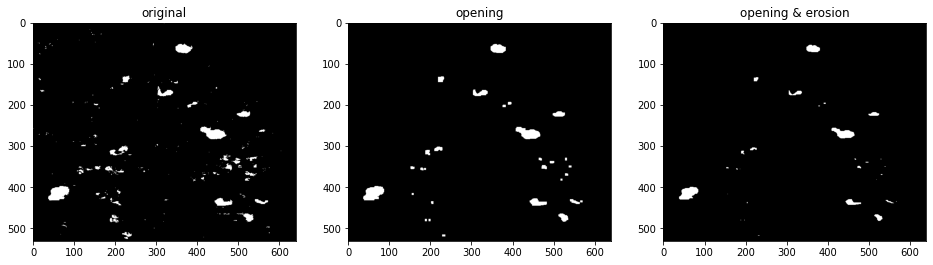

In [ ]:
demo_image = test_images[0]


test = thresh_weight(mpimg.imread(demo_image))
kernel = np.ones((3,3),np.uint8) # this shows us we are using 8 adjacent as we have a centre pixel surrounded by 8.
print(kernel)
opening = cv2.morphologyEx(test, cv2.MORPH_OPEN, kernel, iterations=2)
# erosion - for a pixel that is surrounded by black pixels, remove all the surrounding
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
erosion = cv2.erode(opening,kernel,iterations = 2)


plt.figure(figsize=(16, 12))
plt.subplot(2,3,1)
plt.imshow(test)
plt.title("original")
plt.subplot(2,3,2)
plt.imshow(opening)
plt.title("opening")
plt.subplot(2,3,3)
plt.imshow(erosion)
plt.title("opening & erosion")

### Above, select which round produced the best result, use it below to mark the apples.

# Find the centroid of each apple

29 , Apples have been detected
32 , Apples are labelled
90.60000000000001% of apples have been detected


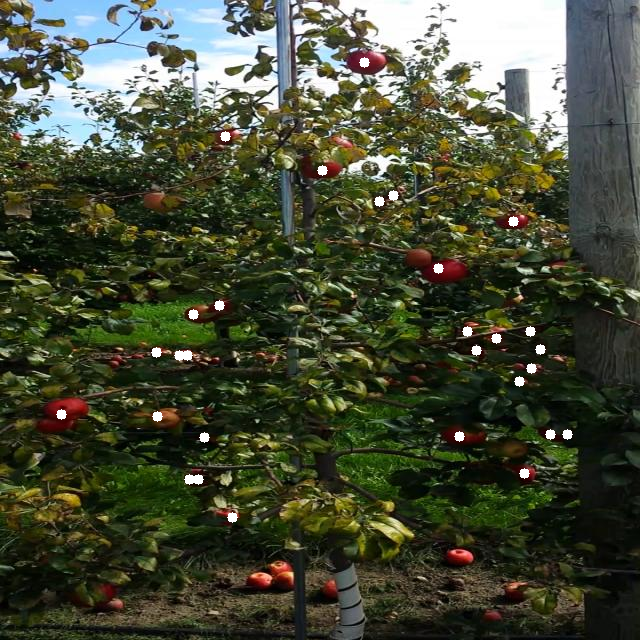

In [ ]:
display = cv2.imread(demo_image)
labels, nlabels = ndimage.label(erosion)  # Label features in an array. Any non-zero values in input are counted as features and zero values are considered the background.
print( str(nlabels) + " , Apples have been detected")


centroid = ndimage.center_of_mass(erosion, labels, np.arange(nlabels) +1 ) # calculate the center of mass of the values of an array at labels.

# draw circles representing the centroids
for cen in centroid:
  display = cv2.circle(display, (cen[1].astype(int), cen[0].astype(int)), radius=5, color=(255, 255, 255), thickness=-1)


# Retrieve labelled number of apples in the photo
label = open(test_labels[0])
NumberOfApples = len(label.readlines())
print(str(NumberOfApples) + " , Apples are labelled")
print(str(round(nlabels/NumberOfApples,3)*100) + "% of apples have been detected")




cv2_imshow(display)


# Next Steps
- create loops to run the code on the rest of the apples and just output the numbers, not images.


In [ ]:
for i in range(len(test_images)):
  # Select Image
  test= thresh_weight(mpimg.imread(test_images[i]))

  # Perform Opening, then eroision
  kernel = np.ones((3,3),np.uint8)
  opening = cv2.morphologyEx(test, cv2.MORPH_OPEN, kernel, iterations=2)
  kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
  erosion = cv2.erode(opening,kernel,iterations = 4)

  # count the number of apples detected
  labels, nlabels = ndimage.label(erosion)  # Label features in an array. Any non-zero values in input are counted as features and zero values are considered the background.

  # Retrieve labelled number of apples in the photo, print detected number, label number and % detected
  label = open(test_labels[i])
  NumberOfApples = len(label.readlines())
  print("for image: " + test_images[i])
  print( str(nlabels) + " , Apples have been detected")
  print(str(NumberOfApples) + " , Apples are labelled")
  print(str(round(nlabels/NumberOfApples,3)*100) + "% of apples have been detected")
  print("\n")

for image: /content/drive/Shareddrives/Machine_Vision_Group_4/MinneApple_Datasets/Comparison_test_dataset/test_combined/dataset1_back_1081_png.rf.61ad8a45c7a6cfefce41e0ae4aa209f1.jpg
15 , Apples have been detected
32 , Apples are labelled
46.9% of apples have been detected


for image: /content/drive/Shareddrives/Machine_Vision_Group_4/MinneApple_Datasets/Comparison_test_dataset/test_combined/dataset1_back_1141_png.rf.0216021bb8e9179983fb45da0c6fa934.jpg
14 , Apples have been detected
36 , Apples are labelled
38.9% of apples have been detected


for image: /content/drive/Shareddrives/Machine_Vision_Group_4/MinneApple_Datasets/Comparison_test_dataset/test_combined/dataset1_back_301_png.rf.ab9701d9c6a849627fce81f64d5105c7.jpg
39 , Apples have been detected
25 , Apples are labelled
156.0% of apples have been detected


for image: /content/drive/Shareddrives/Machine_Vision_Group_4/MinneApple_Datasets/Comparison_test_dataset/test_combined/dataset1_back_991_png.rf.5626aedb831e06350ffdb6b3e8f

KeyboardInterrupt: ignored